In [1]:
#숫자 처리/그림 그리기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #차트그리기

# 딥러닝 모델/학습도구
import torch 
import torch.nn as nn #리니어나 ~ 랠루나 모델 가지고 있어
import torch.nn.functional as F
import torch.optim as optim #함수 최적화

#이미지 데이터셋과 전처리
import torchvision.datasets as datasets 
import torchvision.transforms as transforms #이미지 크기

#데이터를 배치(batch)로 꺼내주기
from torch.utils.data import DataLoader #원하는 배치 모양으로 섞어서
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' 
#torch와 matplotlib 충돌 시 커널 죽는거 방지



In [2]:
cifar10_train=datasets.CIFAR10(root='../data00/cifar10_data',
                               train=True,
                               download=True,
                               transform=transforms.Compose([transforms.ToTensor]))
cifar10_test=datasets.CIFAR10(root='../data00/cifar10_data',
                               train=False,
                               download=True,
                               transform=transforms.Compose([transforms.ToTensor]))

In [3]:
print(cifar10_train)
print(cifar10_test)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data00/cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data00/cifar10_data
    Split: Test
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )


In [4]:
print(cifar10_train.data.shape) #5만장, 가로 32 세로 32
# print(cifar10_train.data[0]) #점 하나에 레드그린블루값 

#모니터에서는 칼라의 3개, RGB로 잡혀
#RGB 칼라이미지 [ 59  62  63] 맨 첫점.

print(cifar10_train.targets[:10]) 
#첫번째 이미지 [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


칼라이미지라서 채널이 붙어. 3 은 채널이야.

뿌리자

In [5]:
def plot(x,y):
  plt.figure(figsize=(8,6))
  for i in range(len(x)): #x의 갯수만큼 for 돌린다. 
    plt.subplot(5,5, i+1) #i+1 인덱스가 0에서 시작해서 그런가? ㅇㅁㅇ?
    plt.title(y[i]) #토치로 안바꿔서 item쓰면 에러남
    img=np.array(x[i].reshape(32,32,3)) #위치맞춰주라는건데 뭐지?
    plt.imshow(img, cmap='gray') #cmap은 의미없어. 그레이해도 칼라 나와.
    plt.axis('off')
  plt.show() #그림 하나, for문만큼 돌려

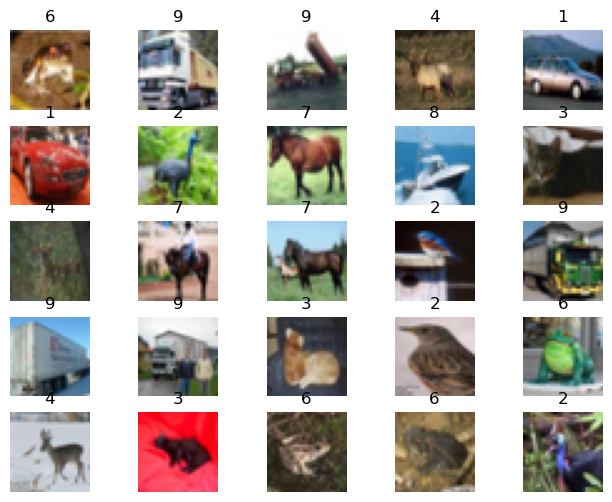

In [6]:
plot(cifar10_train.data[:25], cifar10_train.targets[:25])

칼라이미지라서 채널이 있다는 점!

In [7]:
print(type(cifar10_train.data)) #넘파일 3차원 배열
print(type(cifar10_train.targets)) #리스트 값을 가져
print(cifar10_train.targets) #값이 쭉 나와

<class 'numpy.ndarray'>
<class 'list'>
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 

파이토치의 텐서파일로 고쳐보자

In [8]:
# train_data:(row, col, chanel) -> (chanel, row, col)
cifar10_train.data1=torch.FloatTensor(cifar10_train.data).permute(0,3,1,2) 
#순서 바꿔야해
print(cifar10_train.data1.shape)
#4차원으로 확인 됨, 채널이 앞에 오도록 순서 바꿔

cifar10_train.targets1=torch.LongTensor(cifar10_train.targets)
print(cifar10_train.data1.size()) #텐서로 바꼈으니 shape든 size든
print(cifar10_train.targets1.size())
print(type(cifar10_train.data1)) #넘파이 배열 -> 텐서
print(type(cifar10_train.targets1)) #리스트 -> 텐서

torch.Size([50000, 3, 32, 32])
torch.Size([50000, 3, 32, 32])
torch.Size([50000])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


data1 로 한 이유는 data 원본이 바껴버리니까!!!
근데 배열순서는 왜 바꾸지?????????????????
.permute(0,3,1,2) 

스케일 조정

In [9]:
x1=cifar10_train.data1.float()/255
y=cifar10_train.targets1 #변수 안바껴서 y1으로 안잡아도 괜찮아????

x1[0] #0에서 1사이 값으로 바뀜 원래는 0에서 255 사이 값이었어

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

x1을 x로 대입
데이터 갯수, 채널, 행, 열 -> 4차원을 1차원으로 펼쳐서 만들어

In [10]:
x=x1.view(x1.size(0), -1) #32*32*3 한 값
print(x.size())

input_size = x.size(-1) #3072
output_size = int(max(y))+1 # 10 0에서 9까지 값인데 int로 max 잡고 +1

torch.Size([50000, 3072])


훈련데이터 변형 끝

테스트 데이터 변형 시작

원래 데이터를 보호하기 위해 1 써

In [11]:
#test data (row, col, chaner) => (chaner, row, col)
cifar10_test.data1=torch.FloatTensor(cifar10_test.data).permute(0, 3, 1, 2)
cifar10_test.targets1=torch.LongTensor(cifar10_test.targets)

결과 하나 확인해보자.
순서가 바뀐지 확인

In [12]:
cifar10_test.data1.size()

torch.Size([10000, 3, 32, 32])

In [13]:
cifar10_test.data1[0]
cifar10_test.data1[0].size() #순서 잘 바꼈네

torch.Size([3, 32, 32])

In [14]:
ratio = [0.8, 0.2]
train_cnt=int(x.size(0)*ratio[0]) #50000*0.8
valid_cnt=int(x.size(0)*ratio[1]) #50000*0.2
test_cnt=len(cifar10_test.data)
print(train_cnt, valid_cnt, test_cnt) #전체 데이터에서 쪼갰어
cnts = [train_cnt, valid_cnt]

40000 10000 10000


In [15]:
indices = torch.randperm(x.size(0)) #0~49999 숫자를 랜덤하게 섞어줌
#print(indices)
x=torch.index_select(x, dim=0, index=indices) #x데이터의 순서를 indices 순서로 섞어
y=torch.index_select(y, dim=0, index=indices)

In [16]:
x2=list(x.split(cnts, dim=0))
y2=list(y.split(cnts, dim=0))
y2+=[(cifar10_test.data1.float()/255).view(test_cnt,-1)]
y2+=[cifar10_test.targets1]

In [17]:
for x_i, y_i in zip(x2, y2):
  print(x_i.size(), y_i.size())

torch.Size([40000, 3072]) torch.Size([40000])
torch.Size([10000, 3072]) torch.Size([10000])


Batch Normalization 을 줄여서 BatchNorm 이라고 표기
신경망의 출력값을 평균 0, 분산 1 가깝게 정규화 하여 
학습 안정성 높임
수렴속도 높임

큰 학습률 사용가능
초기 값에 덜 민감하게 함.(w나 b가 랜덤하게 만들어지니까?????)
- 모델 학습의 성능을 높임 

In [18]:
model = nn.Sequential(
  nn.Linear(input_size, 500), 
  nn.LeakyReLU(),
  nn.BatchNorm1d(500), #정규화를 한번 더
  nn.Linear(500, 400),
  nn.LeakyReLU(),
  nn.BatchNorm1d(400),
  nn.Linear(400, 300),
  nn.LeakyReLU(),
  nn.BatchNorm1d(300),
  nn.Linear(300, 200),
  nn.LeakyReLU(),
  nn.BatchNorm1d(200),
  nn.Linear(200, 100),
  nn.LeakyReLU(),
  nn.BatchNorm1d(100),
  nn.Linear(100, output_size)

)

model

Sequential(
  (0): Linear(in_features=3072, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=500, out_features=400, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=400, out_features=300, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=300, out_features=200, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=200, out_features=100, bias=True)
  (13): LeakyReLU(negative_slope=0.01)
  (14): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=100, out_features=10, bia

In [19]:
crit = nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())


In [20]:
epochs=1001
batch_size=256
from copy import deepcopy
lowest_loss=np.inf # 최소 비용함수 값
lowest_epoch=np.inf # 최소 비용함수 일때 epoch
best_model=None
early_stop=50


In [21]:
train_history, valid_history=[],[]

for epoch in range(epochs):
  x_=x2[0].split(batch_size, dim=0)
  y_=y2[0].split(batch_size, dim=0)

  train_loss=0
  y_hat=[]
  for x_i, y_i in zip(x_, y_):
      #print(x_i.size(), y_i.size())
      y_hat_i=model(x_i)
      loss=crit(y_hat_i, y_i.squeeze())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss+=float(loss)

  train_loss=train_loss/len(x_) # train_loss/(40000/256)

  with torch.no_grad():
      x_=x2[1].split(batch_size, dim=0)
      y_=y2[1].split(batch_size, dim=0)
      valid_loss=0

      for x_i, y_i in zip(x_, y_):
          y_hat_i=model(x_i)
          loss=crit(y_hat_i, y_i.squeeze())
          valid_loss+=float(loss)

          y_hat+=[y_hat_i]
      valid_loss=valid_loss/len(x_) #10000/255
  
  train_history+=[train_loss]
  valid_history+=[valid_loss]

  if epoch%10==0:
    print(f'epoch:{epoch},train_loss:{train_loss},valid_loss:{valid_loss},lowest_loss:{lowest_loss}')
  
  if valid_loss <= lowest_loss:
    lowest_loss=valid_loss
    lowest_epoch=epoch
    best_model=deepcopy(model)
  else:
    if early_stop > 0 and lowest_epoch+early_stop < epoch:
        print(f'{lowest_epoch}이후 {early_stop}증가하는 동안 손실함수 감소 없음')
        break
    
print(f'epoch {lowest_epoch}일 때 손실함수 {lowest_loss}가 검증데이터로 가장 낮은 손실함수 값을 가짐')

C:\Users\it\AppData\Local\Temp\ipykernel_9736\785680563.py:16: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  train_loss+=float(loss)


epoch:0,train_loss:1.7342766113341994,valid_loss:1.625395119190216,lowest_loss:inf
epoch:10,train_loss:1.0033601957141973,valid_loss:1.517849388718605,lowest_loss:1.435409638285637
epoch:20,train_loss:0.5850280422693604,valid_loss:2.026417243480682,lowest_loss:1.435409638285637
epoch:30,train_loss:0.2923738710155153,valid_loss:2.670033037662506,lowest_loss:1.435409638285637
epoch:40,train_loss:0.1773387927823006,valid_loss:3.210927051305771,lowest_loss:1.435409638285637
epoch:50,train_loss:0.13233179774633638,valid_loss:3.579184687137604,lowest_loss:1.435409638285637
6이후 50증가하는 동안 손실함수 감소 없음
epoch 6일 때 손실함수 1.435409638285637가 검증데이터로 가장 낮은 손실함수 값을 가짐


그래프를 그려보자
모델로 하면 정확하 결과를 얻기 어렵데 무슨 말이지????

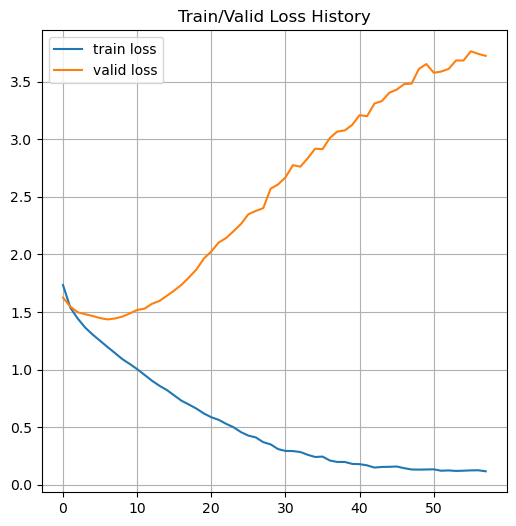

In [22]:
plot_from = 0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title('Train/Valid Loss History')
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], 
         label='train loss')
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], 
         label='valid loss')

plt.legend()
plt.show()

In [23]:
best_model.eval()
test_loss=0
y_hat=[]
with torch.no_grad():
    x_=x2[-1].split(batch_size, dim=0) #10000/256
    y_=y2[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i=best_model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        test_loss+=loss
        y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat, dim=0)
print('test loss:',test_loss)

test loss: tensor(4.1689)


In [24]:
correct_cnt=(y2[-1].squeeze()==torch.argmax(y_hat, dim=-1)).sum()
print(correct_cnt/10000)

tensor(0.1014)


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df=pd.DataFrame(confusion_matrix(y2[-1], torch.argmax(y_hat, dim=1)))
df

,0,1,2,3,4,5,6,7,8,9
0,105,95,84,94,123,68,113,119,78,121
1,106,88,86,121,100,78,95,120,98,108
2,106,96,74,88,129,75,107,99,106,120
3,107,101,94,112,96,59,113,103,105,110
4,88,94,96,101,111,95,122,99,112,82
5,102,101,86,100,109,75,110,104,103,110
6,93,93,74,99,97,77,140,89,98,140
7,101,102,93,121,95,67,119,103,84,115
8,89,101,78,121,89,74,128,100,107,113
9,95,105,91,104,103,62,128,109,104,99


오버피팅

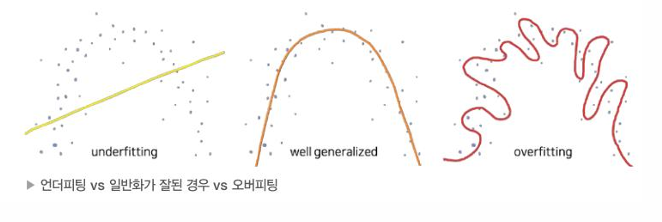